# [учебный проект]

# Определение стоимости автомобилей

## Введение:
Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

## Цель проекта
    
<p>Требуется построить модель машинного обучения для определения стоимости автомобиля.
<p>
<p>

## Описание данных
<p>Признаки
<p>•	DateCrawled — дата скачивания анкеты из базы
<p>•	VehicleType — тип автомобильного кузова
<p>•	RegistrationYear — год регистрации автомобиля
<p>•	Gearbox — тип коробки передач
<p>•	Power — мощность (л. с.)
<p>•	Model — модель автомобиля
<p>•	Kilometer — пробег (км)
<p>•	RegistrationMonth — месяц регистрации автомобиля
<p>•	FuelType — тип топлива
<p>•	Brand — марка автомобиля
<p>•	NotRepaired — была машина в ремонте или нет
<p>•	DateCreated — дата создания анкеты
<p>•	NumberOfPictures — количество фотографий автомобиля
<p>•	PostalCode — почтовый индекс владельца анкеты (пользователя)
<p>•	LastSeen — дата последней активности пользователя

<p>Целевой признак
<p>Price — цена (евро)

    
## План работы
    
<p>1.	Загрузить и подготовить данные.
<p>2.	Обучить разные модели. 
<p>3.	Проанализировать скорость работы и качество моделей.
</div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor

import lightgbm as lgb

C:\Users\Admin\.conda\envs\praktikum_env_win_new\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('autos.csv')

In [3]:
# функция для изучения данных
def see(df):
    print(df.shape)
    print()
    print(df.columns)
    print()
    print(df.info())
    display(df.head())
    display(df.describe())

In [4]:
see(df)

(354369, 16)

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              3543

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<div> <b> Выводы: </div>
<font color='blue'>
<p> Колонка RegistrationYear: есть аномальные значения (min = 1000 или max = 9999 это когда?)
<p> Колонка Power: есть аномальные значения (max = 20000 л.с. - это ракета, будем счиать её выбросом)
<p> Пропуски в колонках: VehicleType, Gearbox, Model, FuelType, NotRepaired.
<p> Аномалии исключим, пропуски возможно тоже, но это не точно. сначала посмотрим на графики этих фичей.

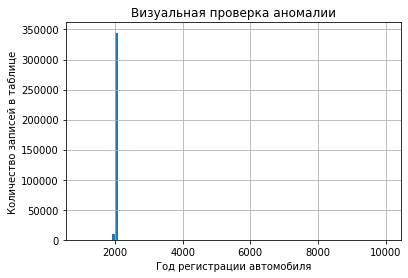

In [6]:
df['RegistrationYear'].hist(bins=100)
plt.title('Визуальная проверка аномалии')
plt.xlabel('Год регистрации автомобиля')
plt.ylabel('Количество записей в таблице'); 

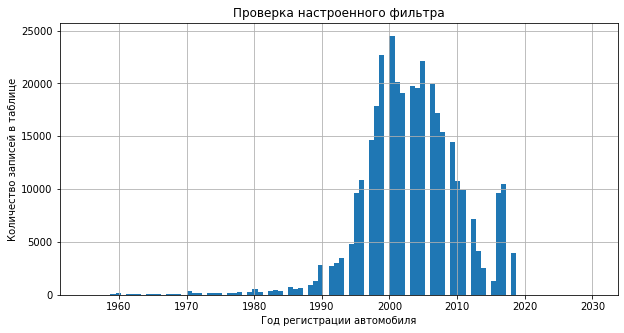

In [7]:
df['RegistrationYear'].hist(bins=100, range=(1955, 2030), figsize=(10, 5))
plt.title('Проверка настроенного фильтра')
plt.xlabel('Год регистрации автомобиля')
plt.ylabel('Количество записей в таблице'); 

In [8]:
df = df[(df['RegistrationYear']>1955) & (df['RegistrationYear']<2030)]

In [9]:
df['RegistrationYear'].describe()

count    353939.00000
mean       2003.13762
std           7.26471
min        1956.00000
25%        1999.00000
50%        2003.00000
75%        2008.00000
max        2019.00000
Name: RegistrationYear, dtype: float64

<div> <b> Выводы: </div>
<font color='blue'>
<p> Аномалии по году регистрации (RegistrationYear) удалены
<p> Удалим аномалии по полю Мощность (Power)

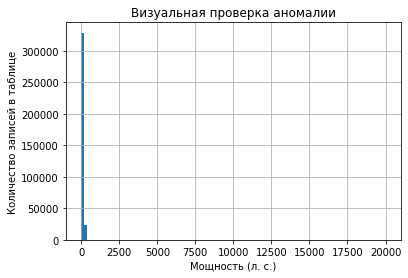

In [10]:
df['Power'].hist(bins=100)
plt.title('Визуальная проверка аномалии')
plt.xlabel('Мощность (л. с.)')
plt.ylabel('Количество записей в таблице'); 

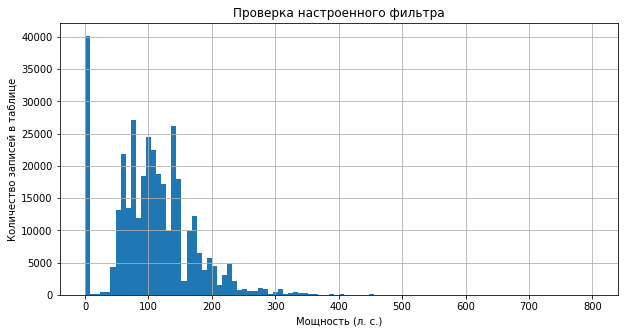

In [11]:
df['Power'].hist(bins=100, range=(0, 800), figsize=(10, 5));
plt.title('Проверка настроенного фильтра')
plt.xlabel('Мощность (л. с.)')
plt.ylabel('Количество записей в таблице'); 

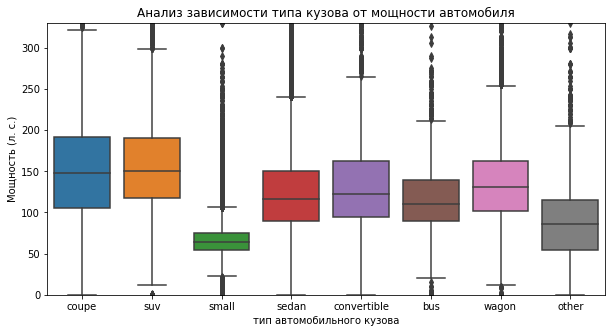

In [12]:
plt.figure(figsize=(10,5))
plt.ylim(0, 330)
sns.boxplot(x='VehicleType', y='Power', data=df)
plt.title('Анализ зависимости типа кузова от мощности автомобиля')
plt.xlabel('тип автомобильного кузова')
plt.ylabel('Мощность (л. с.)'); 

In [13]:
df[df['Power']>330]['Power'].count()/len(df)

0.005707198133011621

In [14]:
df = df[df['Power']<330]

<div> <b> Выводы: </div>
<font color='blue'>
<p> Аномалии по полю Мощность (Power) удалены
<p> Заполним пропуски в колонках: VehicleType, Gearbox, Model, FuelType, NotRepaired.

За данные о названии модели автомобиля, типе коробки передач и типе кузова бороться не будем, т.к. велика вероятность ошибки.
<p> Просто удалим их из выборки.

In [15]:
df.shape

(351869, 16)

In [16]:
df = df.dropna(subset = ['Model'])

In [17]:
df.shape

(332584, 16)

In [18]:
# создадим справочник, по которому можно подобрать тип топлива
df_bm = df.groupby(['Brand','Model','Gearbox','VehicleType'])['Price'].count().reset_index()
df_bm['BM'] = df_bm['Brand']+df_bm['Model']
df_bm = df_bm.drop(['Price', 'Brand', 'Model'], axis=1)
# справочники для склеивания
df_bm_v = df_bm.drop(['Gearbox'], axis=1).drop_duplicates('BM').reset_index(drop=True) 
df_bm_g = df_bm.drop(['VehicleType'], axis=1).drop_duplicates('BM').reset_index(drop=True)

In [19]:
df_v0 = df[df['VehicleType'].isna()].drop(['VehicleType'], axis=1) # пропуски
df_v0['BM'] = df_v0['Brand']+df_v0['Model'] # пропуски

df_v2 = df[~df['VehicleType'].isna()] # без пропусков
df_tmpv = df_v0.merge(df_bm_v, how = 'left', on='BM').drop(['BM'], axis=1)
# так мы заполнили 'VehicleType'
df = pd.concat([df_v2, df_tmpv])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332584 entries, 2 to 30426
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        332584 non-null  object
 1   Price              332584 non-null  int64 
 2   VehicleType        332584 non-null  object
 3   RegistrationYear   332584 non-null  int64 
 4   Gearbox            317026 non-null  object
 5   Power              332584 non-null  int64 
 6   Model              332584 non-null  object
 7   Kilometer          332584 non-null  int64 
 8   RegistrationMonth  332584 non-null  int64 
 9   FuelType           307099 non-null  object
 10  Brand              332584 non-null  object
 11  NotRepaired        270949 non-null  object
 12  DateCreated        332584 non-null  object
 13  NumberOfPictures   332584 non-null  int64 
 14  PostalCode         332584 non-null  int64 
 15  LastSeen           332584 non-null  object
dtypes: int64(7), object(9

In [21]:
df_g0 = df[df['Gearbox'].isna()].drop(['Gearbox'], axis=1) # пропуски
df_g0['BM'] = df_g0['Brand']+df_g0['Model'] # пропуски

df_g2 = df[~df['Gearbox'].isna()] # без пропусков
df_tmpg = df_g0.merge(df_bm_g, how = 'left', on='BM').drop(['BM'], axis=1)
# так мы заполнили 'Gearbox'
df = pd.concat([df_g2, df_tmpg])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332584 entries, 2 to 15557
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        332584 non-null  object
 1   Price              332584 non-null  int64 
 2   VehicleType        332584 non-null  object
 3   RegistrationYear   332584 non-null  int64 
 4   Gearbox            332584 non-null  object
 5   Power              332584 non-null  int64 
 6   Model              332584 non-null  object
 7   Kilometer          332584 non-null  int64 
 8   RegistrationMonth  332584 non-null  int64 
 9   FuelType           307099 non-null  object
 10  Brand              332584 non-null  object
 11  NotRepaired        270949 non-null  object
 12  DateCreated        332584 non-null  object
 13  NumberOfPictures   332584 non-null  int64 
 14  PostalCode         332584 non-null  int64 
 15  LastSeen           332584 non-null  object
dtypes: int64(7), object(9

### Заполнение пропущенных значений для FuelType 

In [23]:
#Объединим бензин из UK и USA
df.loc[(df.FuelType == 'petrol'), 'FuelType'] = 'gasoline'
df['FuelType'].value_counts()

gasoline    301344
lpg           4814
cng            541
hybrid         207
other          129
electric        64
Name: FuelType, dtype: int64

In [24]:
# создадим справочник, по которому можно подобрать тип топлива
df_fuel = df.groupby(['Brand','Model','Gearbox','VehicleType','FuelType'])['Price'].count().reset_index()
df_fuel = df_fuel.rename(columns = {'Price': 'Moda'}, inplace = False)
df_fuel.head(3)

,Brand,Model,Gearbox,VehicleType,FuelType,Moda
0,alfa_romeo,145,manual,coupe,gasoline,11
1,alfa_romeo,145,manual,other,gasoline,1
2,alfa_romeo,145,manual,sedan,gasoline,13


In [25]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3208 entries, 0 to 3207
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        3208 non-null   object
 1   Model        3208 non-null   object
 2   Gearbox      3208 non-null   object
 3   VehicleType  3208 non-null   object
 4   FuelType     3208 non-null   object
 5   Moda         3208 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 150.5+ KB


In [26]:
# выделим таблицу с незвестным видом топлива
df0 = df[df['FuelType'].isna()]
df0 = df0.drop(['FuelType'], axis=1)
# 'BMGV' - это ключ, по которому будет выполненно совмещение таблиц (выбор по справочнику)
df0['BMGV'] = df0['Brand']+df0['Model']+df0['Gearbox']+df0['VehicleType']
df0.shape

(25485, 16)

In [27]:
# упростим справочник (оставим только ключ и таргет)
df_fuel['BMGV'] = df_fuel['Brand'] + df_fuel['Model'] + df_fuel['Gearbox'] + df_fuel['VehicleType']
df_fuel = pd.DataFrame(df_fuel, columns=['BMGV','FuelType'])

In [28]:
# процедура выбора типа топлива по справочнику
df0 = df0.merge(df_fuel, on='BMGV', how='inner')
df0 = df0.drop(['BMGV'], axis=1)
df0.shape

(66183, 16)

In [29]:
df0.head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,FuelType
0,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06,cng
1,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06,electric
2,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06,gasoline


In [30]:
# исключим из основной таблицы строки с неизвестным типом топлива
df = df[~df['FuelType'].isna()]

In [31]:
df = pd.concat([df,df0], sort=False, axis=0).reset_index(drop=True)
# данные о типе топлива востановлены

In [32]:
df['NotRepaired'] = df['NotRepaired'].fillna('?')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373282 entries, 0 to 373281
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        373282 non-null  object
 1   Price              373282 non-null  int64 
 2   VehicleType        373282 non-null  object
 3   RegistrationYear   373282 non-null  int64 
 4   Gearbox            373282 non-null  object
 5   Power              373282 non-null  int64 
 6   Model              373282 non-null  object
 7   Kilometer          373282 non-null  int64 
 8   RegistrationMonth  373282 non-null  int64 
 9   FuelType           373282 non-null  object
 10  Brand              373282 non-null  object
 11  NotRepaired        373282 non-null  object
 12  DateCreated        373282 non-null  object
 13  NumberOfPictures   373282 non-null  int64 
 14  PostalCode         373282 non-null  int64 
 15  LastSeen           373282 non-null  object
dtypes: int64(7), object(

<div> <b> Выводы: </div>
<font color='blue'>
<p> Данные готовы к работе

In [34]:
df['Price'].describe()

count    373282.000000
mean       4228.332542
std        4415.470195
min           0.000000
25%        1000.000000
50%        2500.000000
75%        5999.000000
max       20000.000000
Name: Price, dtype: float64

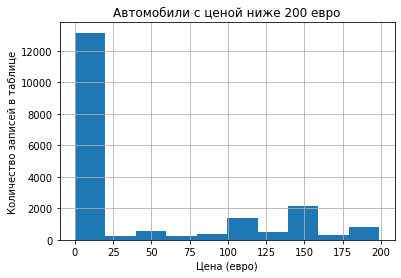

In [36]:
df[df['Price']<200]['Price'].hist()
plt.title('Автомобили с ценой ниже 200 евро')
plt.xlabel('Цена (евро)')
plt.ylabel('Количество записей в таблице'); 

In [37]:
df[df['Price'] < 100]['Price'].count()

14564

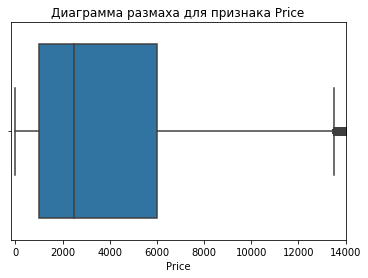

In [38]:
plt.xlim(-200, 14000)
sns.boxplot(df['Price'])
plt.title('Диаграмма размаха для признака Price');

In [39]:
df = df[(df['Price'] > 100)&(~df['Price'].isna())]
df = df.dropna().reset_index(drop=True)

In [40]:
df['Price'].describe()

count    357408.000000
mean       4415.516315
std        4420.217824
min         101.000000
25%        1190.000000
50%        2750.000000
75%        6290.000000
max       20000.000000
Name: Price, dtype: float64

In [41]:
df = df.drop(['DateCrawled','RegistrationMonth',
              'DateCreated','NumberOfPictures',
              'PostalCode','LastSeen'], axis=1)

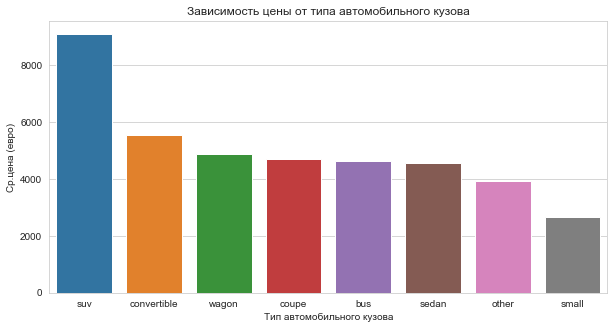

In [42]:
sns.set_style('whitegrid')
df_vehicletype = (df.pivot_table(index='VehicleType', values='Price', aggfunc='mean')
                  .sort_values('Price',ascending=False)
                  .reset_index())
plt.figure(figsize=(10,5))
sns.barplot(x='VehicleType', y='Price', data=df_vehicletype);

plt.title('Зависимость цены от типа автомобильного кузова');
plt.xlabel('Тип автомобильного кузова')
plt.ylabel('Ср.цена (евро)');  

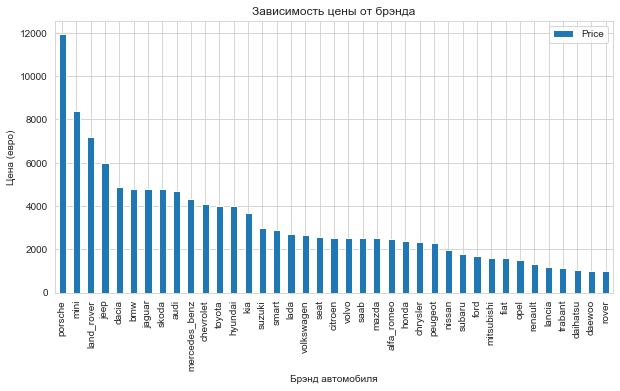

In [43]:
(
df.pivot_table(index='Brand', values='Price', aggfunc='median')
.sort_values('Price',ascending=False).plot(grid=True, kind='bar', figsize=(10, 5))
);

plt.title('Зависимость цены от брэнда')
plt.xlabel('Брэнд автомобиля')
plt.ylabel('Цена (евро)');  

manual    0.77207
auto      0.22793
Name: Gearbox, dtype: float64


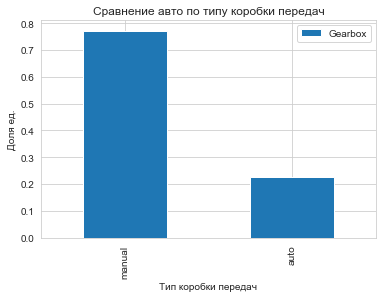

In [44]:
Gearbox = df['Gearbox'].value_counts(normalize=True)
print(Gearbox)
Gearbox.plot(kind='bar'); 
plt.legend(loc='best');

plt.title('Сравнение авто по типу коробки передач')
plt.xlabel('Тип коробки передач')
plt.ylabel('Доля ед.');  

no     0.700757
?      0.200065
yes    0.099178
Name: NotRepaired, dtype: float64


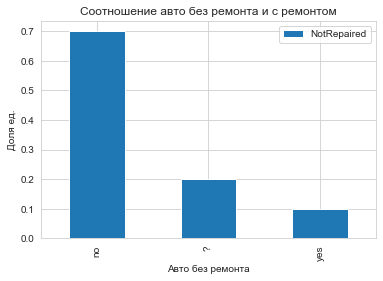

In [45]:
Gearbox = df['NotRepaired'].value_counts(normalize=True)
print(Gearbox)
Gearbox.plot(kind='bar'); 
plt.legend(loc='best');

plt.title('Соотношение авто без ремонта и с ремонтом')
plt.xlabel('Авто без ремонта')
plt.ylabel('Доля ед.');  

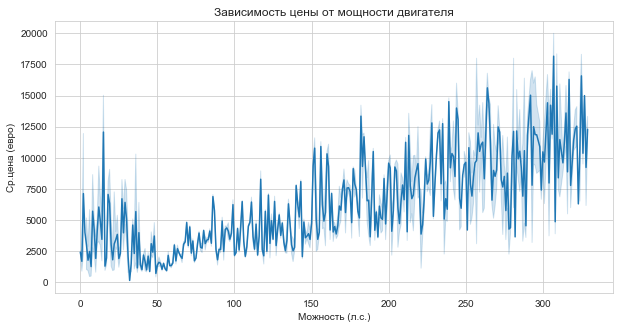

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Power", y="Price")

plt.title('Зависимость цены от мощности двигателя');
plt.xlabel('Можность (л.с.)')
plt.ylabel('Ср.цена (евро)');  

<div> <b> Выводы: </div>
<font color='blue'>
<p> Из графиков стало понятно как цена зависит от количества лошадинных сил, какие бренды автомобилей дороже остальных и что 80% водителей предпочитают коробку автомат. 
<p> В базе нашего магазна всего 10% не битых и не крашенных автомобилей. 

## Обучение моделей

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357408 entries, 0 to 357407
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             357408 non-null  int64 
 1   VehicleType       357408 non-null  object
 2   RegistrationYear  357408 non-null  int64 
 3   Gearbox           357408 non-null  object
 4   Power             357408 non-null  int64 
 5   Model             357408 non-null  object
 6   Kilometer         357408 non-null  int64 
 7   FuelType          357408 non-null  object
 8   Brand             357408 non-null  object
 9   NotRepaired       357408 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.3+ MB


In [48]:
# Выделим числовые и категориальные признаки:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
['Price', 'RegistrationYear', 'Power', 'Kilometer']


In [49]:
df01 = df[categorical_columns]
df02 = df[numerical_columns]
# для категориальных признаков применим порядковое кодирование
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(df01), columns=categorical_columns)
data_ordinal.head(3)

,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired
0,6.0,0.0,117.0,2.0,14.0,0.0
1,5.0,1.0,116.0,2.0,37.0,1.0
2,5.0,1.0,101.0,2.0,31.0,1.0


In [50]:
df = data_ordinal.join(df02)
df.shape

(357408, 10)

In [51]:
df.head(3)

,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,Price,RegistrationYear,Power,Kilometer
0,6.0,0.0,117.0,2.0,14.0,0.0,9800,2004,163,125000
1,5.0,1.0,116.0,2.0,37.0,1.0,1500,2001,75,150000
2,5.0,1.0,101.0,2.0,31.0,1.0,3600,2008,69,90000


In [52]:
target = df['Price']
features = df.drop(['Price'] , axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [53]:
# смасштабируем данные
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

In [54]:
# функция метрики
def rmse(targets, predictions):
    differences = predictions - targets                       
    differences_squared = differences ** 2                    
    mean_of_differences_squared = differences_squared.mean()  
    rmse_val = np.sqrt(mean_of_differences_squared)           
    return rmse_val

In [55]:
%%time
model1 = LinearRegression()
model1.fit(features_train, target_train)
predicted_valid = model1.predict(features_valid)
rmse1 = rmse(target_valid, predicted_valid)

print('RMSE LinearRegression =', rmse1 )

RMSE LinearRegression = 3223.021392413865
Wall time: 113 ms


In [56]:
rmse_score = make_scorer(rmse, greater_is_better = False)

In [57]:
%%time
model3 = DecisionTreeRegressor(random_state=12345) 
param = {'max_depth': range(1,5,1),
        'min_samples_leaf':range(1,6),
        'min_samples_split':range(2,4)}
grid = GridSearchCV(model3, param, cv=5, scoring=rmse_score)
grid.fit(features_train, target_train)
param = grid.best_params_

model3.fit(features_train, target_train)
predicted_valid = model3.predict(features_valid)
rmse3 = rmse(target_valid, predicted_valid)

print('RMSE DecisionTreeRegressor =', rmse3)

RMSE DecisionTreeRegressor = 1848.660145493719
Wall time: 36.8 s


In [58]:
%%time
for depth in range(1, 10, 1):
    model2 = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=12345)
    model2.fit(features_train, target_train)
    predicted_valid = model2.predict(features_valid)
rmse2 = rmse(target_valid, predicted_valid) 
#scores = cross_val_score(model2, features_train, target_train, scoring=rmse, cv=5)
print('RMSE RandomForestRegressor =', rmse2 )

RMSE RandomForestRegressor = 1965.2847151525846
Wall time: 44.6 s


In [59]:
# теперь попробуем бустингом
print("Версия LightGBM      : ", lgb.__version__)

Версия LightGBM      :  3.2.1


In [60]:
%%time
model4 = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=12345)
n_scores = cross_val_score(model4, features_train, target_train, scoring=rmse_score, cv=cv, n_jobs=-1, error_score='raise')

model4.fit(features_train, target_train)
predicted_valid = model4.predict(features_valid)
rmse4 = rmse(target_valid, predicted_valid)

print('RMSE LGBMRegressor =', rmse4)

RMSE LGBMRegressor = 1723.9286646829898
Wall time: 40.8 s


## Анализ моделей

<div> <b> Выводы: </div>
<font color='blue'>
<p> В ходе исследования были рассмотрены 4 ML модели:
<p>RMSE LinearRegression = 3223.021392413865 | Wall time: 113 ms
<p>RMSE DecisionTreeRegressor = 1848.660145493719 | Wall time: 36.8 s   
<p>RMSE RandomForestRegressor = 1965.2847151525846 | Wall time: 44.6 s    
<p>RMSE LGBMRegressor = 1723.9286646829898 | Wall time: 40.8 s
<p> Линейная регрессия выделяется как своей быстротой, так и низкой точностью. Не удовлетворяет условию задачи.
<p> Дерево решений удовлетворяет условиям задачи за приемлемое время
<p> Случайный лес немного точнее и чуть медленее дерева решений
<p> LGBMR от Майкрософт показал похожее время и лучшее качество (рекомендован к внедрению).